# Drug Classification Model

Import all the libraries needed for the model

In [1]:
#Import the libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Import the csv dataset for evaluation and required for building the model

In [4]:
#Import the dataset required for the Model
df = pd.read_csv('/content/Drug20.csv')
names = ["Age", "Sex","BP", "Cholesterol", "Na_to_K","Drug"]
df.columns = names
df.head(50)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [5]:
df['Age'] = df.Age.astype(float)
df.dtypes

,0
Age,float64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


Label Encode the data to make it into a readable form for the model

In [6]:
le = LabelEncoder()

In [7]:
df.Sex = le.fit_transform(df.Sex)
df.BP = le.fit_transform(df.BP)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.Drug = le.fit_transform(df.Drug)
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,0,0,0,25.355,0
1,47.0,1,1,0,13.093,3
2,47.0,1,1,0,10.114,3
3,28.0,0,2,0,7.798,4
4,61.0,0,1,0,18.043,0


In [9]:

df2 = pd.read_csv("/content/Drug20.csv")
names = ["Age", "Sex","BP", "Cholesterol", "Na_to_K","Drug"]
df2.columns = names

In [10]:

features=list(zip(df.Sex,df.BP,df.Cholesterol,df.Drug))


# Visualize the dataset

<ipython-input-11-84b296aafcbb>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Age'],showfliers=True,labels=['Age'])


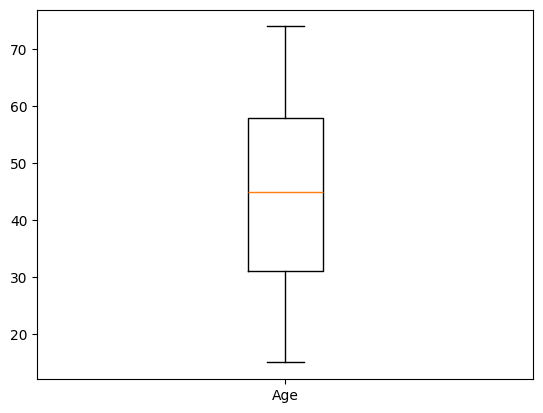

In [11]:
plt.boxplot(df['Age'],showfliers=True,labels=['Age'])
plt.show();

<ipython-input-12-84621c305270>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['BP'],showfliers=True,labels=['BP'])


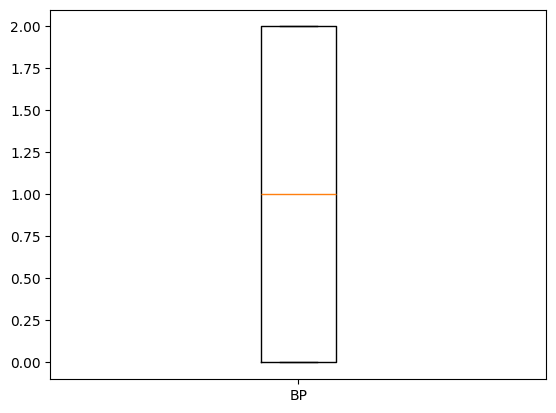

In [12]:
plt.boxplot(df['BP'],showfliers=True,labels=['BP'])
plt.show();

<ipython-input-13-8f597dabcdae>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Cholesterol'],showfliers=True,labels=['Cholesterol'])


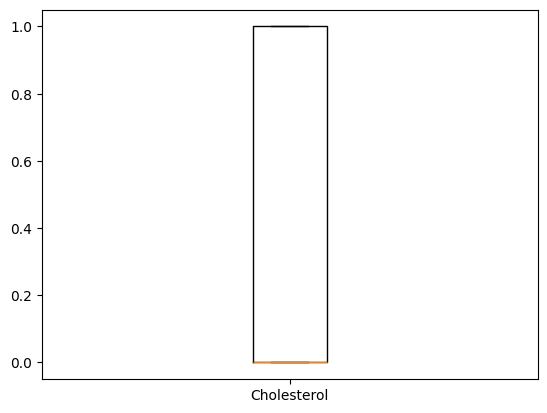

In [13]:


plt.boxplot(df['Cholesterol'],showfliers=True,labels=['Cholesterol'])
plt.show();

<ipython-input-14-46ffead6cec4>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Na_to_K'],showfliers=True,labels=['Na_to_K'])


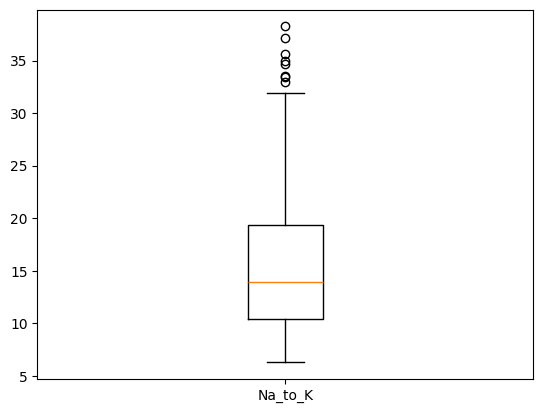

In [14]:
plt.boxplot(df['Na_to_K'],showfliers=True,labels=['Na_to_K'])
plt.show();

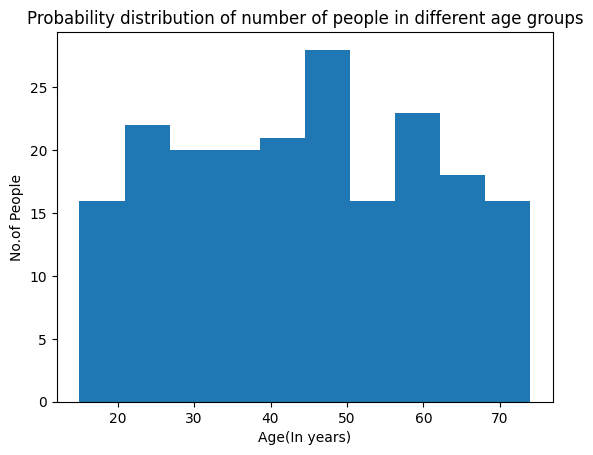

In [15]:
y = df.Age

plt.hist(y,bins=10)

plt.ylabel("No.of People")
plt.xlabel("Age(In years)")
plt.title('Probability distribution of number of people in different age groups')

plt.show()


# Decision Tree

Define the values for training the model using Decision Tree

In [16]:
x_values = df[["Age", "Sex","BP","Cholesterol", "Na_to_K"]]
y_values = df["Drug"]





define the values for x_train , y_train , x_test , y_test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.10,random_state=9)

In [18]:

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

Create the decision tree

In [19]:


# Create an empty list to store the accuracy and the best tested parameter for each decision tree
accuracy = []
depth = []

# Use ii to cycle through values 4 to 5. This will be the max_depth value for the decision tree.
for ii in range(4,5):
    # Set max_depth to ii
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    # Training or fitting the model with the data
    dt.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(dt.score(x_test_scale,y_test))
    # Append the max_depth values to a list
    depth.append(ii)

print(accuracy)

[1.0]


Now find the max depth for the decision tree

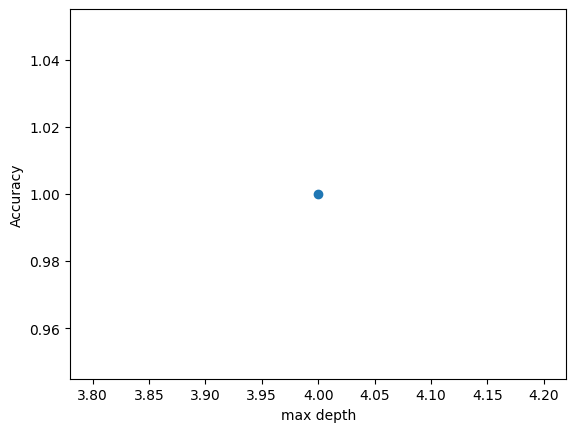

In [20]:
plt.scatter(depth,accuracy)
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.show();

In [21]:
dt = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 5)
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

max_depth and min_samples_split

In [22]:
dt = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 5)
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [23]:
y_predict = dt.predict(x_test_scale)

Print the accuracy of the model

In [24]:
print(accuracy)

[1.0]




Obtain and print the confusion matrix.

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
print(confusion_matrix(y_test, y_predict))

[[6 0 0 0 0]
 [0 5 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]


In [28]:
y_test

,Drug
84,3
60,0
54,2
109,0
156,1
140,1
39,4
116,4
123,0
53,0


In [29]:
import seaborn as sns

<Axes: xlabel='Predicted', ylabel='Actual'>

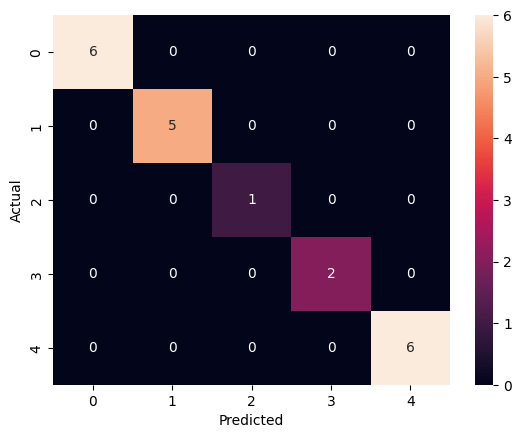

In [30]:
# Create new dataframe
df = pd.DataFrame()

# Create new columns within dataframe
df['Actual'] = y_test
df['Predicted'] = y_predict

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df.Actual,df.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

# Deployment

Sex is label encoded as: "F" = "0" , "M" = "1"
BP is label encoded as: "High" = "0" , "Low" = "1" , "Normal" = "2"
Cholesterol is label encoded as: "HIGH" = "0", "Low" = "1" , "Normal" = "2"
Drug type is label encoded as: "DrugY" = "0" , "drugC" = "3" , "drugX" = "4" , "drugA" = "1" , "drugB" = "2"

In [32]:
test = pd.DataFrame()
test["Age"] = [int(input("Enter the age:"))]
test["Sex"] = [int(input("Enter the Sex:"))]
test["BP"] = [int(input("Enter the BP:"))]
test["Cholesterol"] = [int(input("Enter the Cholesterol:"))]
test["Na_to_K"] = [float(input("Enter the Na_to_K ratio :"))]
prediction = dt.predict(test)
if prediction == [1]:
    print("Drug Y")
elif prediction ==[0]:
    print("Drug A")
elif prediction ==[2]:
    print("Drug B")
elif prediction ==[3]:
    print("Drug C")
elif prediction ==[4]:
    print("Drug D")

    print(prediction)



Enter the age:23
Enter the Sex:0
Enter the BP:0
Enter the Cholesterol:0
Enter the Na_to_K ratio :25
Drug A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


We now have deployed the model for easy access to everyone

Thank You

In [ ]:
df.head()

,Actual,Predicted
84,3,3
60,0,0
54,2,2
109,0,0
156,1,1
